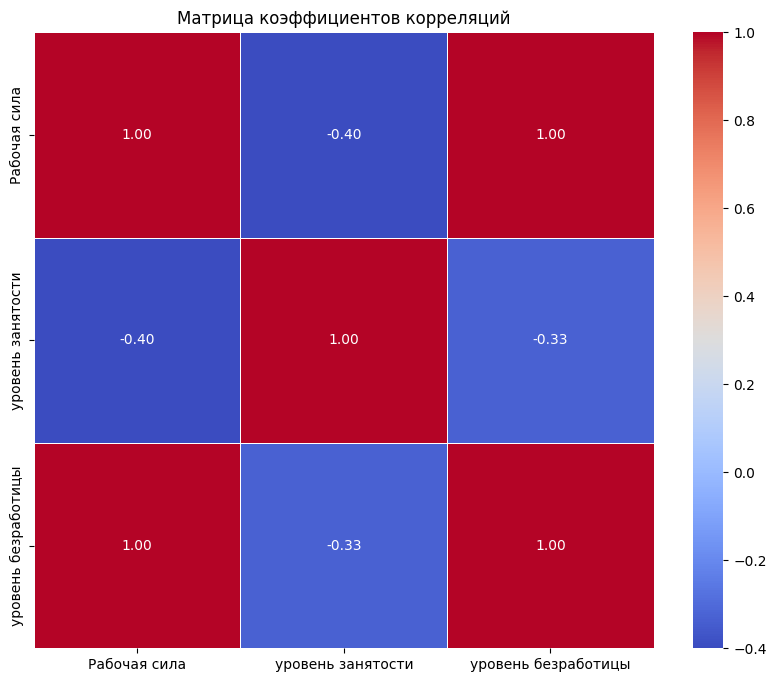

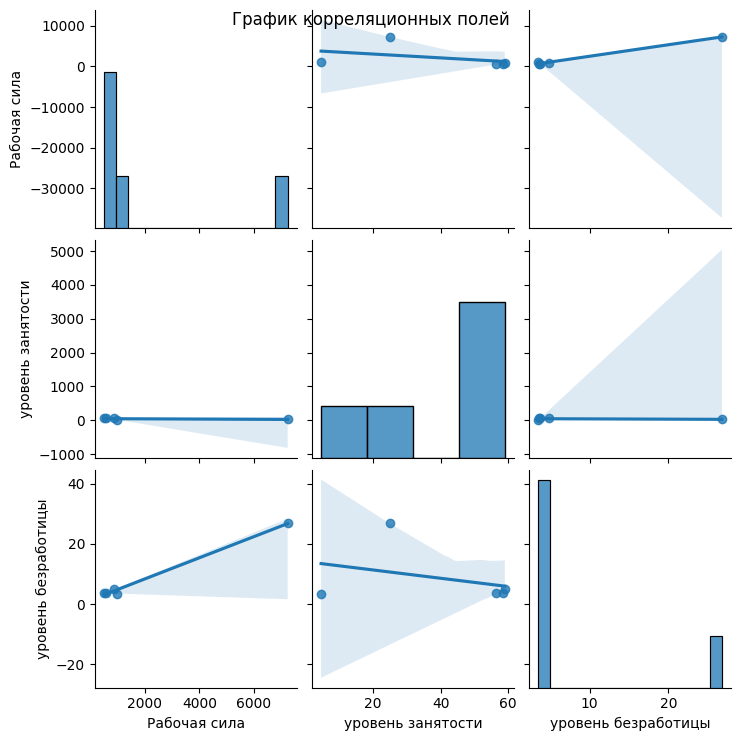

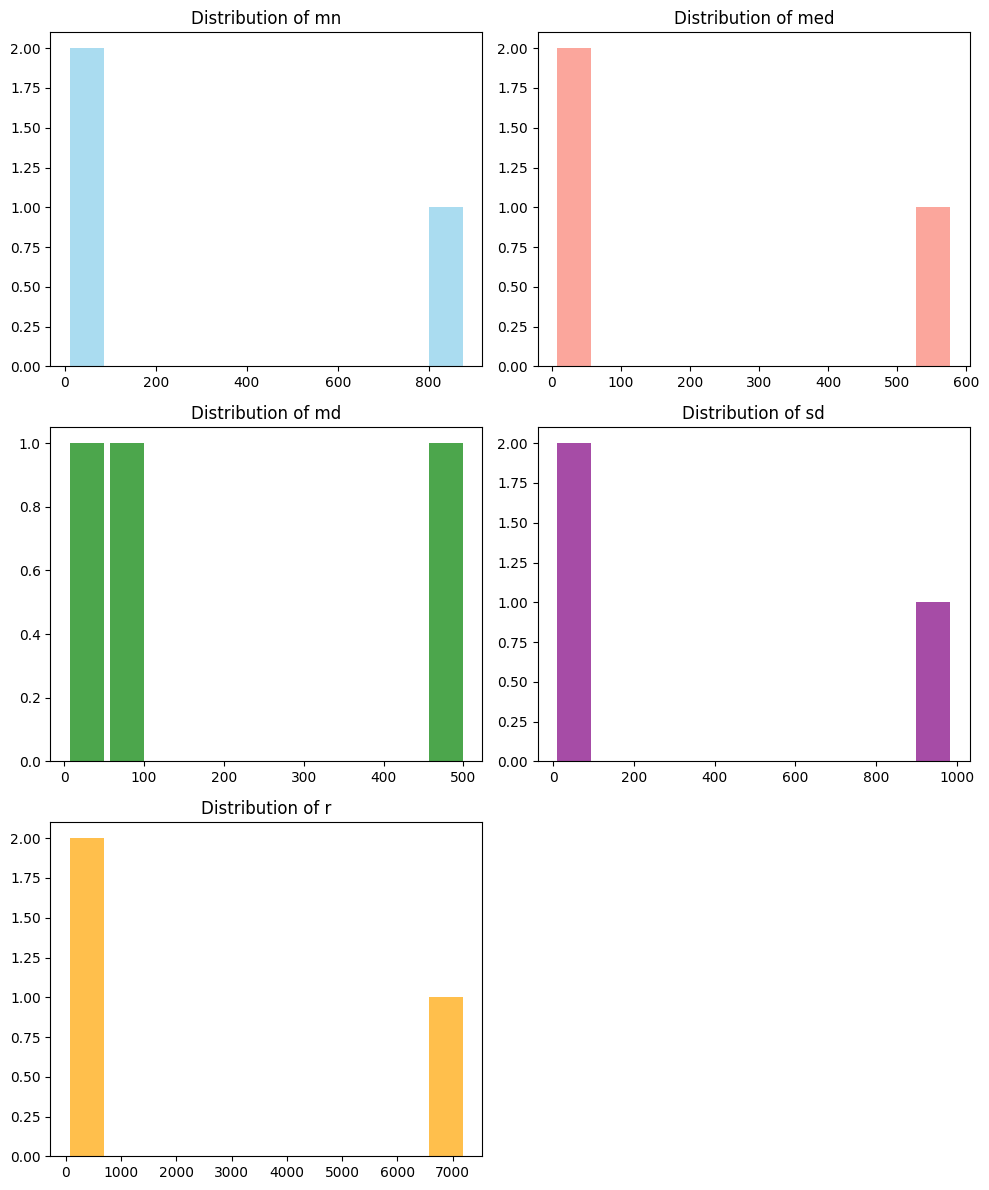

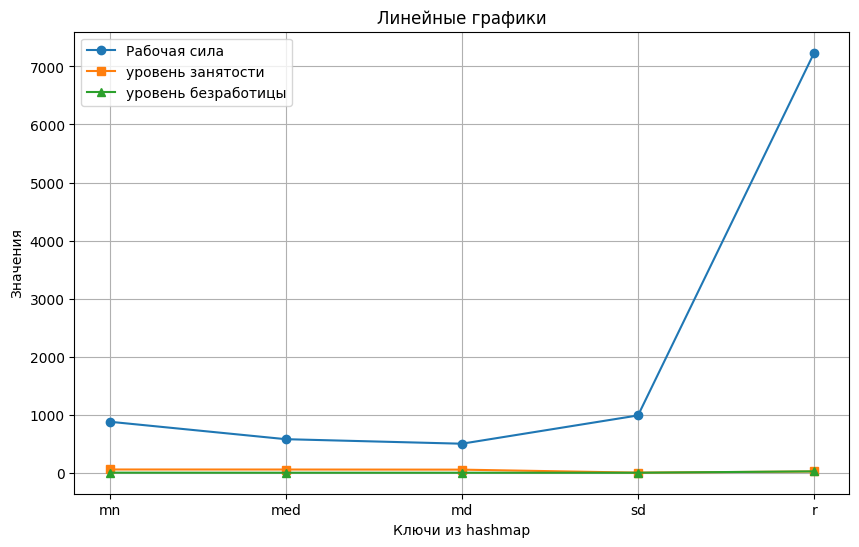

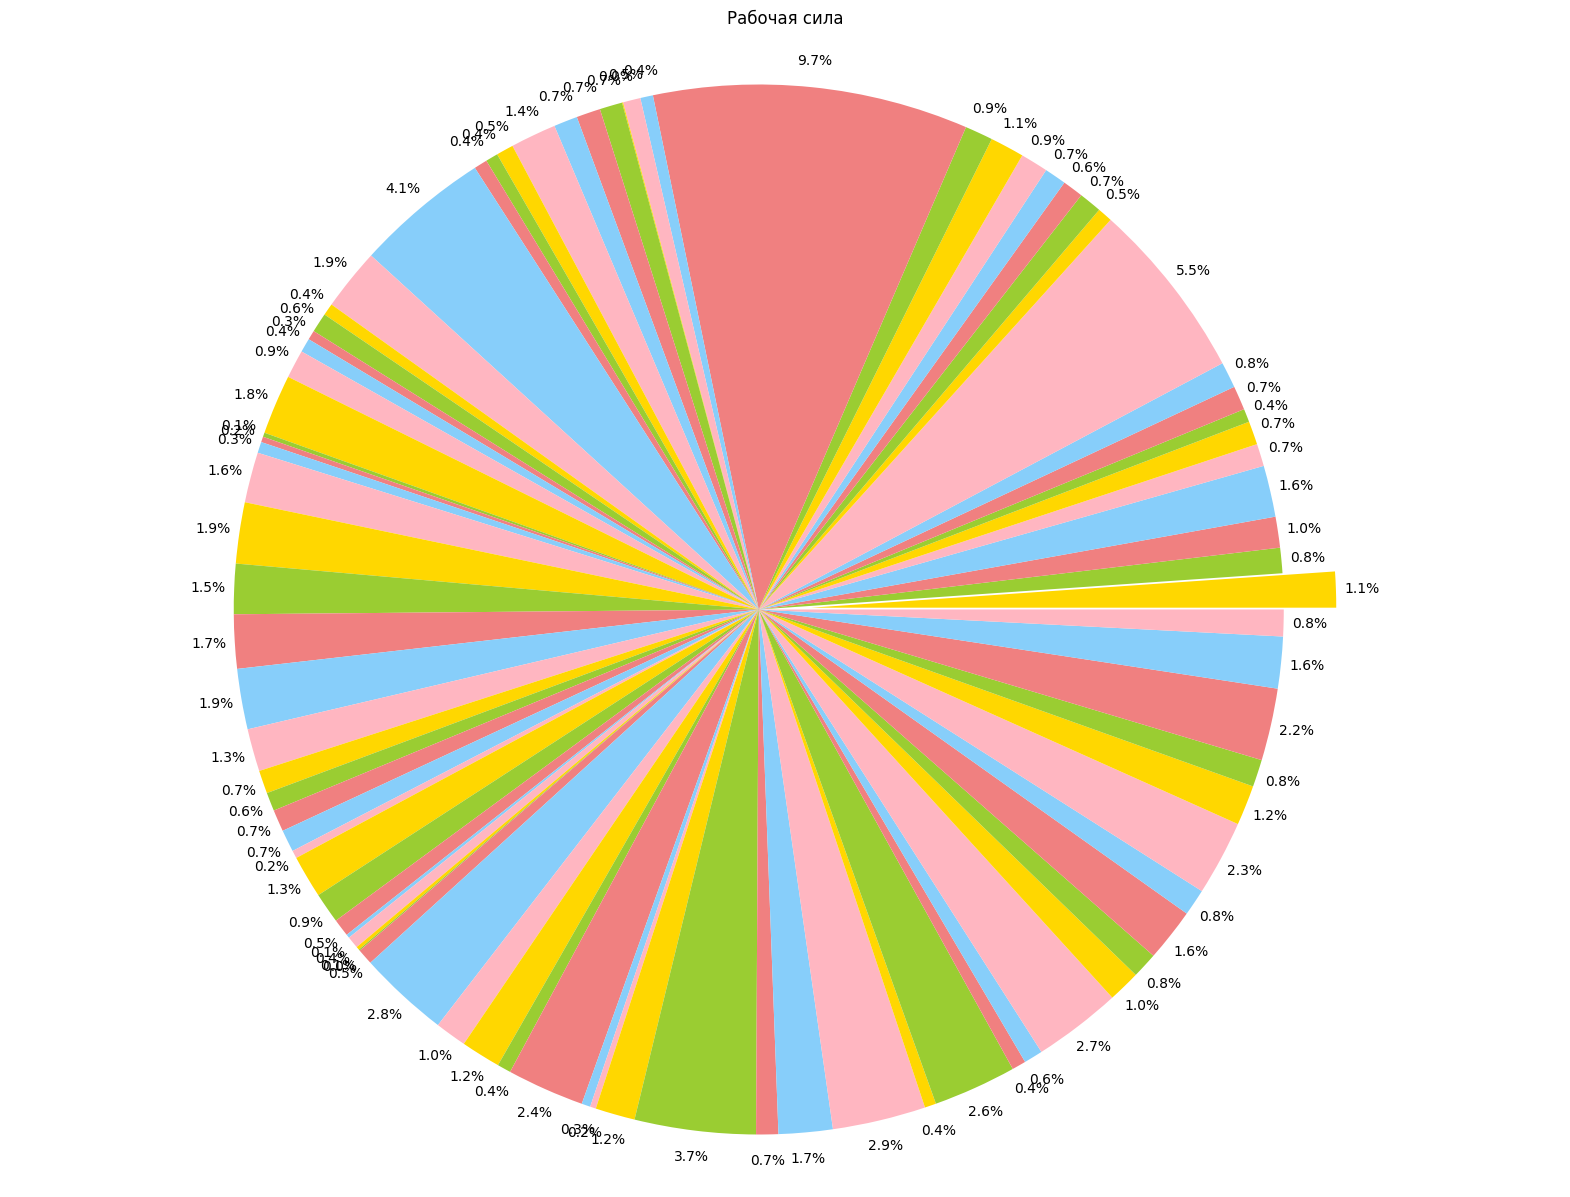

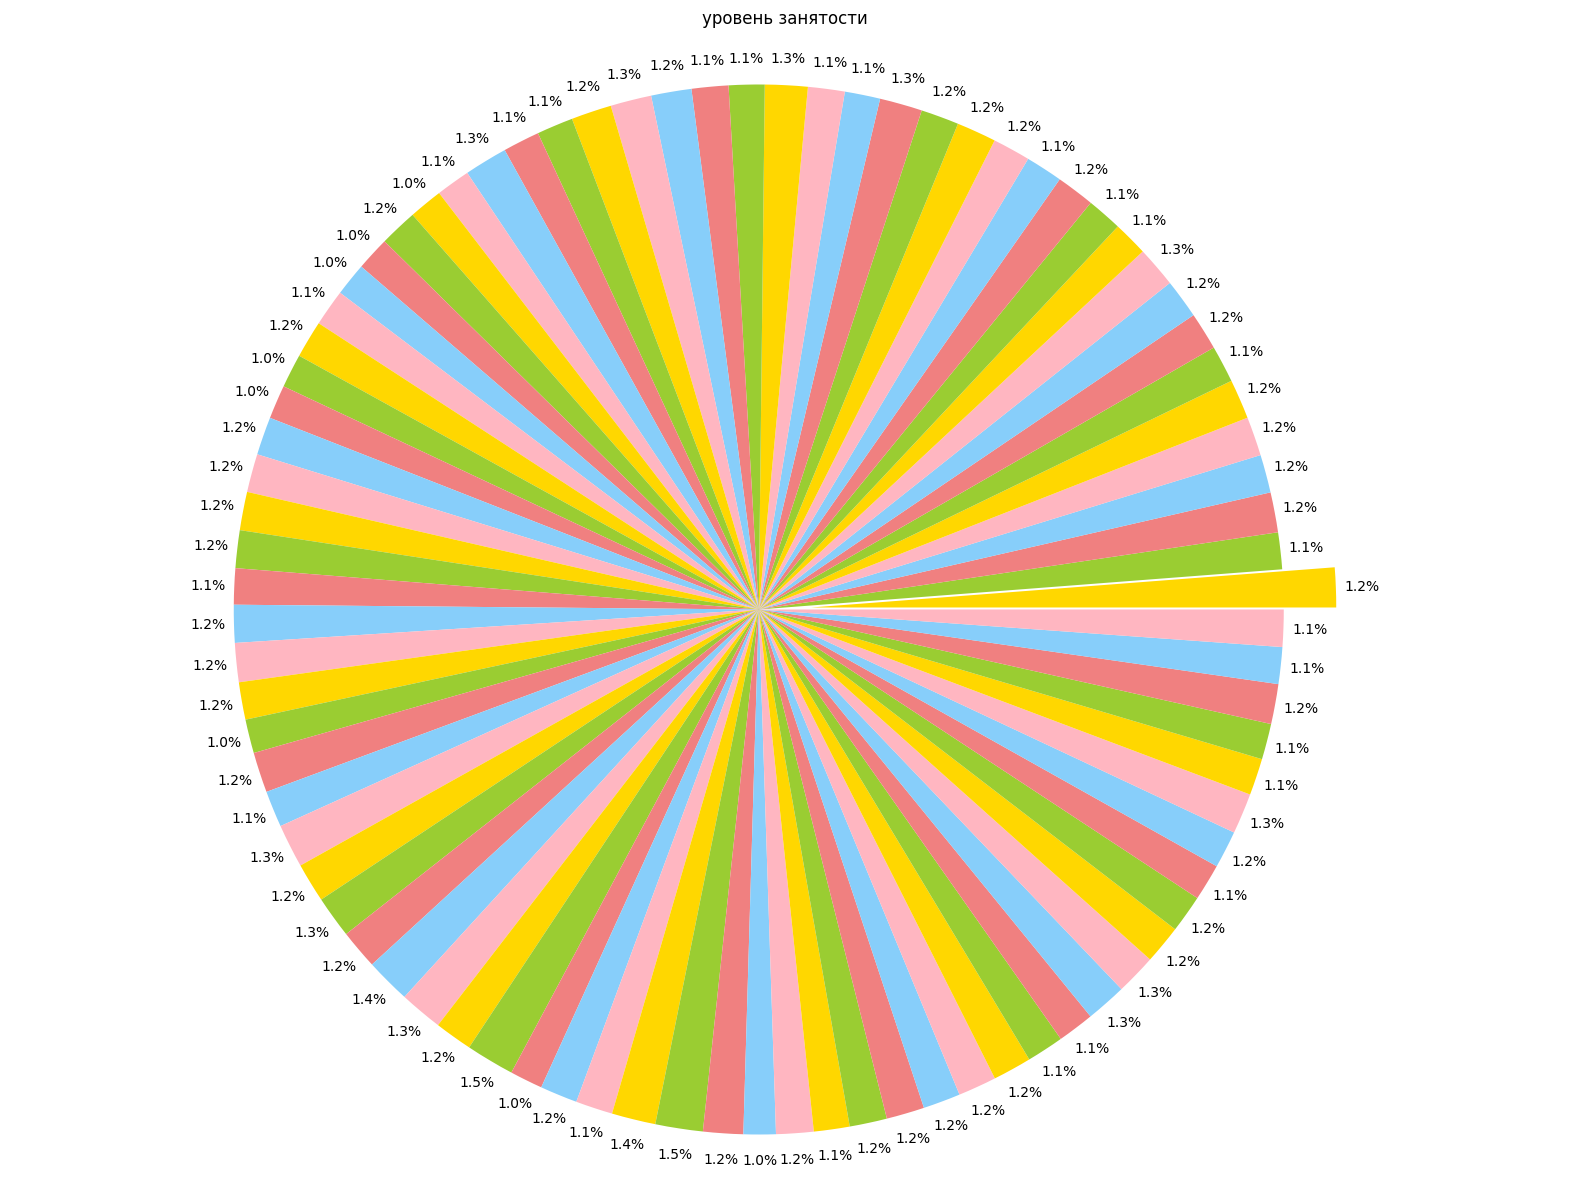

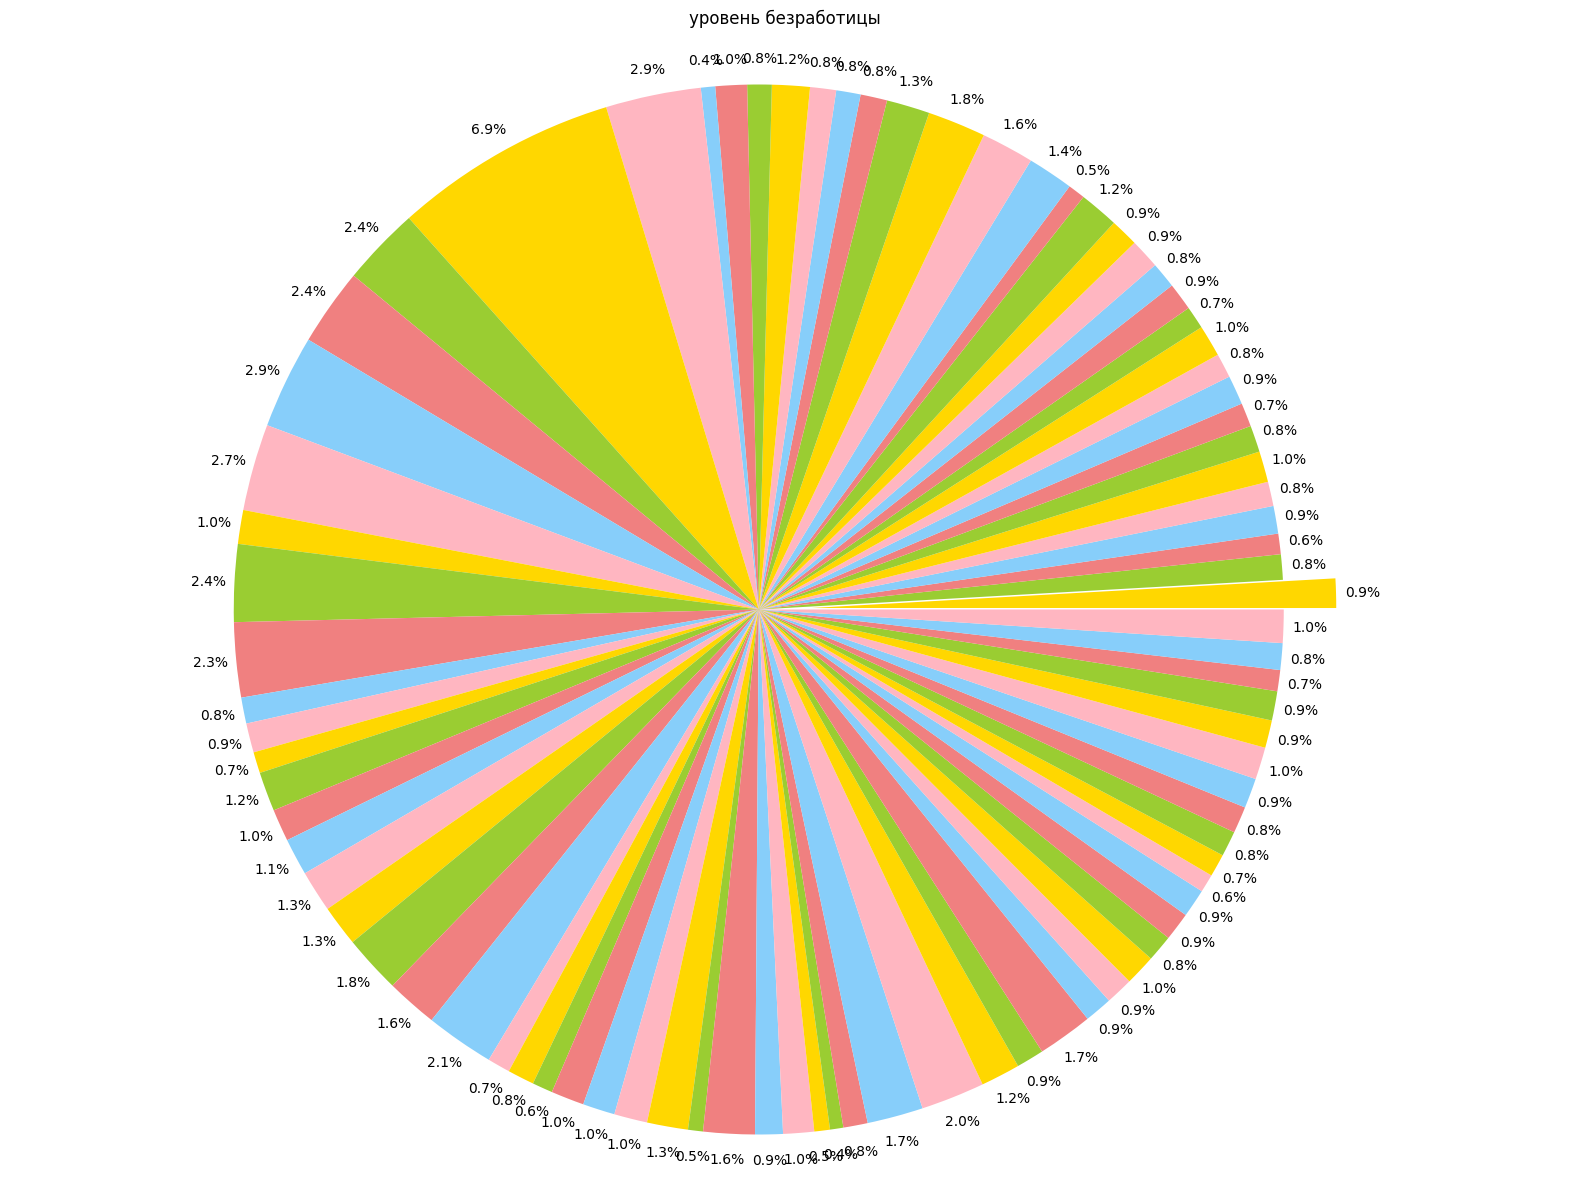

    Наблюдения больше средней величины
0                                 1187
1                                 4151
2                                 7260
3                                 1057
4                                 3095
5                                 1432
6                                 1380
7                                 1163
8                                 1410
9                                 1154
10                                1247
11                                1396
12                                 984
13                                 983
14                                2087
15                                 911
16                                1785
17                                 912
18                                2789
19                                1241
20                                2147
21                                1918
22                                2028
23                                1218
24                       

In [83]:
import numpy as np
import pandas as pd
from collections import defaultdict
from collections import Counter
import math
import seaborn as sns
import matplotlib.pyplot as plt

parsed_csv = pd.read_csv("project.csv")

dictionary = dict()
totals_dictionary = defaultdict(lambda: 0)

for index, row in parsed_csv.iterrows():
    key1 = row["ФО"]
    key2 = row["Субъект"]

    if key1 not in dictionary:
        dictionary[key1] = dict()

    dictionary[key1][key2] = {
        "Рабочая сила": row["Рабочая сила"],
        "уровень занятости": row["уровень занятости"],
        "уровень безработицы": row["уровень безработицы"]
    }

    totals_dictionary["Рабочая сила"] += row["Рабочая сила"]
    totals_dictionary["уровень занятости"] += round(row["уровень занятости"], 2)
    totals_dictionary["уровень безработицы"] += round(row["уровень безработицы"], 2)

# п 2.2
def print_variable_for_federal_district_and_region(federal_district, region, variable):
   print(dictionary[federal_district][region][variable])

# print_variable_for_federal_district_and_region("Центральный", "Костромская область", "Рабочая сила")

# п 2.3
def print_data_for_federal_district(federal_district):
    for key in dictionary[federal_district]:
        print(f"{key}: {dictionary[federal_district][key]}")

# print_data_for_federal_district("Северо-Западный")

def make_list_from_dictionary(variable):
    result = []

    for key1 in dictionary:
        for key2 in dictionary[key1]:
            result.append(dictionary[key1][key2][variable])

    return result


# п.3
# print(totals_dictionary["Рабочая сила"])
# print(round(totals_dictionary["уровень занятости"], 2))
# print(round(totals_dictionary["уровень безработицы"], 2))
def pr(variable):
    result = []

    for key1 in dictionary:
        for key2 in dictionary[key1]:
            calc = dictionary[key1][key2][variable] / totals_dictionary[variable] * 100
            percentage = round(calc, 2)
            # print(str(percentage) + "%")
            result.append(percentage)

    return result


regular_list1 = make_list_from_dictionary("Рабочая сила")
regular_list2 = make_list_from_dictionary("уровень занятости")
regular_list3 = make_list_from_dictionary("уровень безработицы")

pr_list1 = pr("Рабочая сила")
pr_list2 = pr("уровень занятости")
pr_list3 = pr("уровень безработицы")

# print(pr_list1)
# print(pr_list2)
# print(pr_list3)

# п. 3.2
# print("Рабочая сила всего процентов: " + str(round(sum(pr_list1))))
# print("уровень занятости всего процентов: " + str(round(sum(pr_list2))))
# print("уровень безработицы всего процентов: " + str(round(sum(list3))))

# п. 4
def mn(list): # Среднее арифметическое
    return sum(list) / len(list)

# print("Округленное среднее арифметическое в процентах по рабочей силе: " + str(round(mn(pr_list1), 2)))

def med(list): # Медиана - среднее двух средних элементов
    sorted_list = sorted(list)
    length_of_list = len(sorted_list)
    if length_of_list % 2 == 0:  # Если количество элементов четное
        mid1 = sorted_list[length_of_list // 2 - 1]
        mid2 = sorted_list[length_of_list // 2]
        median = (mid1 + mid2) / 2
    else:  # Если количество элементов нечетное
        median = sorted_list[length_of_list // 2]  # Медиана - средний элемент
    return median

# print("Округленная медиана в процентах по рабочей силе: " + str(round(med(pr_list1), 2)))

def md(list):
    count_dict = Counter(list)
    # # # Чтобы вернуло список:
    # max_count = max(count_dict.values())  # Находим наибольшее количество повторений
    # mode = [k for k, v in count_dict.items() if v == max_count]  # Находим все элементы с максимальным количеством повторений
    # return mode
    # # # Чтобы вернуло одно значение:
    count_dict = Counter(list)
    mode_value = max(count_dict, key=count_dict.get)
    return mode_value

# print("Мода в процентах по рабочей силе: " + str(md(pr_list1)))

def sd(list):
    if len(list) < 2:
        return None  # Если в массиве меньше двух элементов, среднее квадратическое отклонение не определено
    mean = sum(list) / len(list)  # Вычисляем среднее значение
    squared_diffs = [(x - mean) ** 2 for x in list]  # Вычисляем квадрат разности для каждого элемента
    variance = sum(squared_diffs) / len(list)  # Вычисляем дисперсию
    standard_deviation = math.sqrt(variance)  # Считаем квадратный корень из дисперсии
    return standard_deviation

# print("Округленное cреднее квадратическое отклонение в процентах по рабочей силе: " + str(round(sd(pr_list1), 2)))

def r(list):
    return max(list) - min(list)

# print("Размах в процентах по рабочей силе: " + str(r(pr_list1)))

def print_function_result(input_string):
    input_parts = input_string.split()
    if len(input_parts) != 2:
        print("Неверный формат.")
    else:
        function_name, variable_name = input_parts
        if function_name in globals() and callable(globals()[function_name]): # вот здесь можно проверять на конкретный список переменных и названий функций (но мне лень)
            print(globals()[function_name](eval(variable_name)))
        else:
           print("Неверное название переменной списка или название функции.")

# п. 4.1
# input_str = input("Введите название функции и название переменной списка через пробел (например sd pr_list1):")
# print_function_result(input_str)

# п. 4.2
def make_map_of_function_results_for_list(list):
    return { "mn": mn(list), "med": med(list), "md": md(list), "sd": sd(list), "r": r(list) }

fn_list1 = make_map_of_function_results_for_list(regular_list1) # Рабочая сила
fn_list2 = make_map_of_function_results_for_list(regular_list2) # уровень занятости
fn_list3 = make_map_of_function_results_for_list(regular_list3) # уровень безработицы

# print(fn_list1)
# print(fn_list2)
# print(fn_list3)

# п.5
data = {'Рабочая сила': fn_list1, 'уровень занятости': fn_list2, 'уровень безработицы': fn_list3} # Создаем DataFrame из hashmap
df = pd.DataFrame(data)
corr_matrix = df.corr() # Вычисляем коэффициенты корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Матрица коэффициентов корреляций')
plt.show()
sns.pairplot(df, kind='reg')
plt.suptitle('График корреляционных полей')
plt.show()

# п.6
# Извлечение значений для каждой переменной
mn_values = [fn_list1['mn'], fn_list2['mn'], fn_list3['mn']]
med_values = [fn_list1['med'], fn_list2['med'], fn_list3['med']]
md_values = [fn_list1['md'], fn_list2['md'], fn_list3['md']]
sd_values = [fn_list1['sd'], fn_list2['sd'], fn_list3['sd']]
r_values = [fn_list1['r'], fn_list2['r'], fn_list3['r']]

# Создание гистограмм
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Гистограммы для mn, med, md
axs[0, 0].hist(mn_values, bins=10, color='skyblue', alpha=0.7, rwidth=0.85)
axs[0, 0].set_title('Distribution of mn')
axs[0, 1].hist(med_values, bins=10, color='salmon', alpha=0.7, rwidth=0.85)
axs[0, 1].set_title('Distribution of med')
axs[1, 0].hist(md_values, bins=10, color='green', alpha=0.7, rwidth=0.85)
axs[1, 0].set_title('Distribution of md')

# Гистограммы для sd, r
axs[1, 1].hist(sd_values, bins=10, color='purple', alpha=0.7, rwidth=0.85)
axs[1, 1].set_title('Distribution of sd')
axs[2, 0].hist(r_values, bins=10, color='orange', alpha=0.7, rwidth=0.85)
axs[2, 0].set_title('Distribution of r')

# Убрать пустую область
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()

# п.7
keys = list(fn_list1.keys())
values_fn1 = list(fn_list1.values())
values_fn2 = list(fn_list2.values())
values_fn3 = list(fn_list3.values())

plt.figure(figsize=(10, 6))
plt.plot(keys, values_fn1, label='Рабочая сила', marker='o') # Построение линии для Рабочей силы
plt.plot(keys, values_fn2, label='уровень занятости', marker='s') # Построение линии для уровня занятости
plt.plot(keys, values_fn3, label='уровень безработицы', marker='^') # Построение линии для уровня безработицы

plt.xlabel('Ключи из hashmap')
plt.ylabel('Значения')
plt.title('Линейные графики')
plt.legend()
plt.grid(True)
plt.show()

# п.8
variables_data = {
    "Рабочая сила": pr_list1,
    "уровень занятости": pr_list2,
    "уровень безработицы": pr_list3
}

# Create pie charts
labels = list(variables_data.keys())
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightpink']

for key in variables_data:
    plt.figure(figsize=(20, 15))
    explode = [0.1] + [0] * (len(variables_data[key]) - 1)
    plt.pie(variables_data[key], explode=explode, labels=[''] * len(variables_data[key]), colors=colors, autopct='%1.1f%%', pctdistance=1.05)
    plt.title(f'{key}')
    plt.axis('equal')
    plt.show()

# п.9
filtered_values1 = [value for value in regular_list1 if value > fn_list1['mn']] # берем среднее арифметическое (mn)
df1 = pd.DataFrame({'Наблюдения больше средней величины': filtered_values1})
print(df1)
# п.10
filtered_values2 = [value for value in regular_list2 if value < fn_list2['med']] # берем медиану (med)
df2 = pd.DataFrame({'Наблюдения меньше медианы': filtered_values2})
print(df2)
# п.11
df11 = pd.DataFrame([(region, city, data['Рабочая сила'], data['уровень занятости'], data['уровень безработицы']) for region, cities in dictionary.items() for city, data in cities.items()], columns=['Регион', 'Город', 'Рабочая сила', 'уровень занятости', 'уровень безработицы'])
sorted_df11 = df11.sort_values(by=['уровень занятости', 'Рабочая сила', 'уровень безработицы'])
sorted_df11.reset_index(drop=True, inplace=True)
print(sorted_df11.head(10))
